<a href="https://colab.research.google.com/github/AndriyaTahrim/Weather-Prediction-CSE422-/blob/main/Seattle_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
#Data manipulation libraries :
import numpy as np  #numpy
import pandas as pd  #pandas
import tensorflow as tf
#System libraries
import glob #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell

#Map plotting
import folium #Interactive Maps viz



#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib
import math
from math import pi

#date manipulation
import datetime as dt

#Missing data detector lib
import missingno as mn

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/422_Projects/seattle-weather (1).csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values

In [ ]:
#Data manipulation libraries :
import numpy as np  #numpy
import pandas as pd  #pandas
import tensorflow as tf
#System libraries
import glob #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell

#Map plotting
import folium #Interactive Maps viz



#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib
import math
from math import pi

#date manipulation
import datetime as dt

#Missing data detector lib
import missingno as mn

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, copy=False, strategy="mean", )

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Getting to know the dataset

In [ ]:
data.shape

(1461, 6)

In [ ]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
122,2012-05-02,0.5,13.3,5.6,2.5,rain
300,2012-10-27,23.1,14.4,9.4,5.1,rain
698,2013-11-29,0.5,9.4,5.0,2.1,rain
325,2012-11-21,11.2,8.3,3.9,5.5,rain
42,2012-02-12,1.0,8.3,5.0,1.3,rain
430,2013-03-06,11.9,7.2,5.0,4.1,rain
620,2013-09-12,0.0,25.6,15.0,1.7,sun
1278,2015-07-02,0.0,33.9,17.8,3.4,sun
871,2014-05-21,0.0,20.0,10.6,1.7,sun
750,2014-01-20,0.0,10.0,2.8,2.2,sun


In [ ]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


PRE-PROCESSING

In [ ]:
#checking if there is any null values
data.isnull().sum()   #no null values

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


Categorical Feature:

In [ ]:
#for encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
# check datatypes
data.dtypes

,0
date,object
precipitation,float64
temp_max,float64
temp_min,float64
wind,float64
weather,object


In [ ]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#set up LabelEncoder Object
enc= LabelEncoder()

#Apply the encoding to the "weather" colimn
data['weather'] = enc.fit_transform(data['weather'])

#Compare the datas
print(data[['weather']].head(15))

    weather
0         0
1         2
2         2
3         2
4         2
5         2
6         2
7         4
8         2
9         2
10        4
11        4
12        4
13        3
14        3


In [ ]:
#Categorical variables:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['date'], dtype='object')


In [ ]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [ ]:
data['date'] = pd.to_datetime(data['date'])

Basic Feature engineering:


In [ ]:
#'date' transformation( New feature year, month, day, hour):

data['Date'] = pd.to_datetime(data['date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,Date,year,month,day,hour
0,2012-01-01,0.0,12.8,5.0,4.7,0,2012-01-01,2012,1,1,0
1,2012-01-02,10.9,10.6,2.8,4.5,2,2012-01-02,2012,1,2,0
2,2012-01-03,0.8,11.7,7.2,2.3,2,2012-01-03,2012,1,3,0
3,2012-01-04,20.3,12.2,5.6,4.7,2,2012-01-04,2012,1,4,0
4,2012-01-05,1.3,8.9,2.8,6.1,2,2012-01-05,2012,1,5,0


In [ ]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather,Date,year,month,day,hour
196,2012-07-15,0.0,18.9,13.3,3.8,2,2012-07-15,2012,7,15,0
515,2013-05-30,0.0,16.7,9.4,5.3,4,2013-05-30,2013,5,30,0
597,2013-08-20,0.0,25.6,16.1,4.6,4,2013-08-20,2013,8,20,0
184,2012-07-03,5.8,18.3,10.6,6.0,2,2012-07-03,2012,7,3,0
1159,2015-03-05,0.0,13.3,2.8,1.3,4,2015-03-05,2015,3,5,0
412,2013-02-16,0.0,11.1,3.9,5.6,2,2013-02-16,2013,2,16,0
15,2012-01-16,2.5,1.7,-2.8,5.0,3,2012-01-16,2012,1,16,0
669,2013-10-31,0.3,14.4,10.6,2.2,2,2013-10-31,2013,10,31,0
400,2013-02-04,0.0,10.6,6.7,2.6,2,2013-02-04,2013,2,4,0
598,2013-08-21,0.0,27.8,15.0,4.3,4,2013-08-21,2013,8,21,0


In [ ]:
data.nunique()

,0
date,1461
precipitation,111
temp_max,67
temp_min,55
wind,79
weather,5
Date,1461
year,4
month,12
day,31


In [ ]:
data['weather'].unique()

array([0, 2, 4, 3, 1])

Feature Selection:

In [ ]:
#Creating a list of colum names to drop
to_drop = ['hour']

#Dropping the colomn from dataset
data_subset = data.drop(to_drop, axis=1)

#Print the head of the new dataset
data_subset.head()

,date,precipitation,temp_max,temp_min,wind,weather,Date,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,0,2012-01-01,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,2,2012-01-02,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,2,2012-01-03,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,2,2012-01-04,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,2,2012-01-05,2012,1,5


Vizualisation:

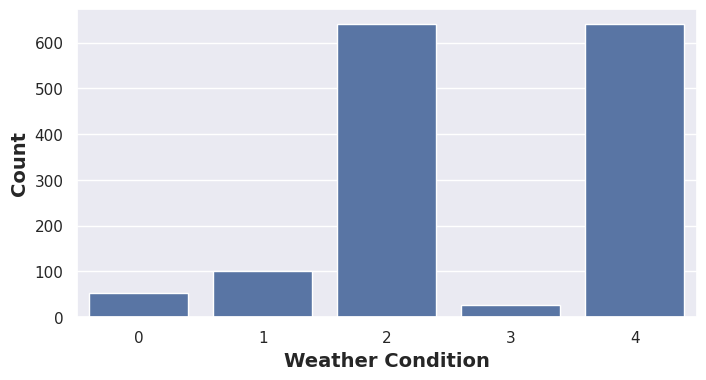

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'weather',data = data_subset)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

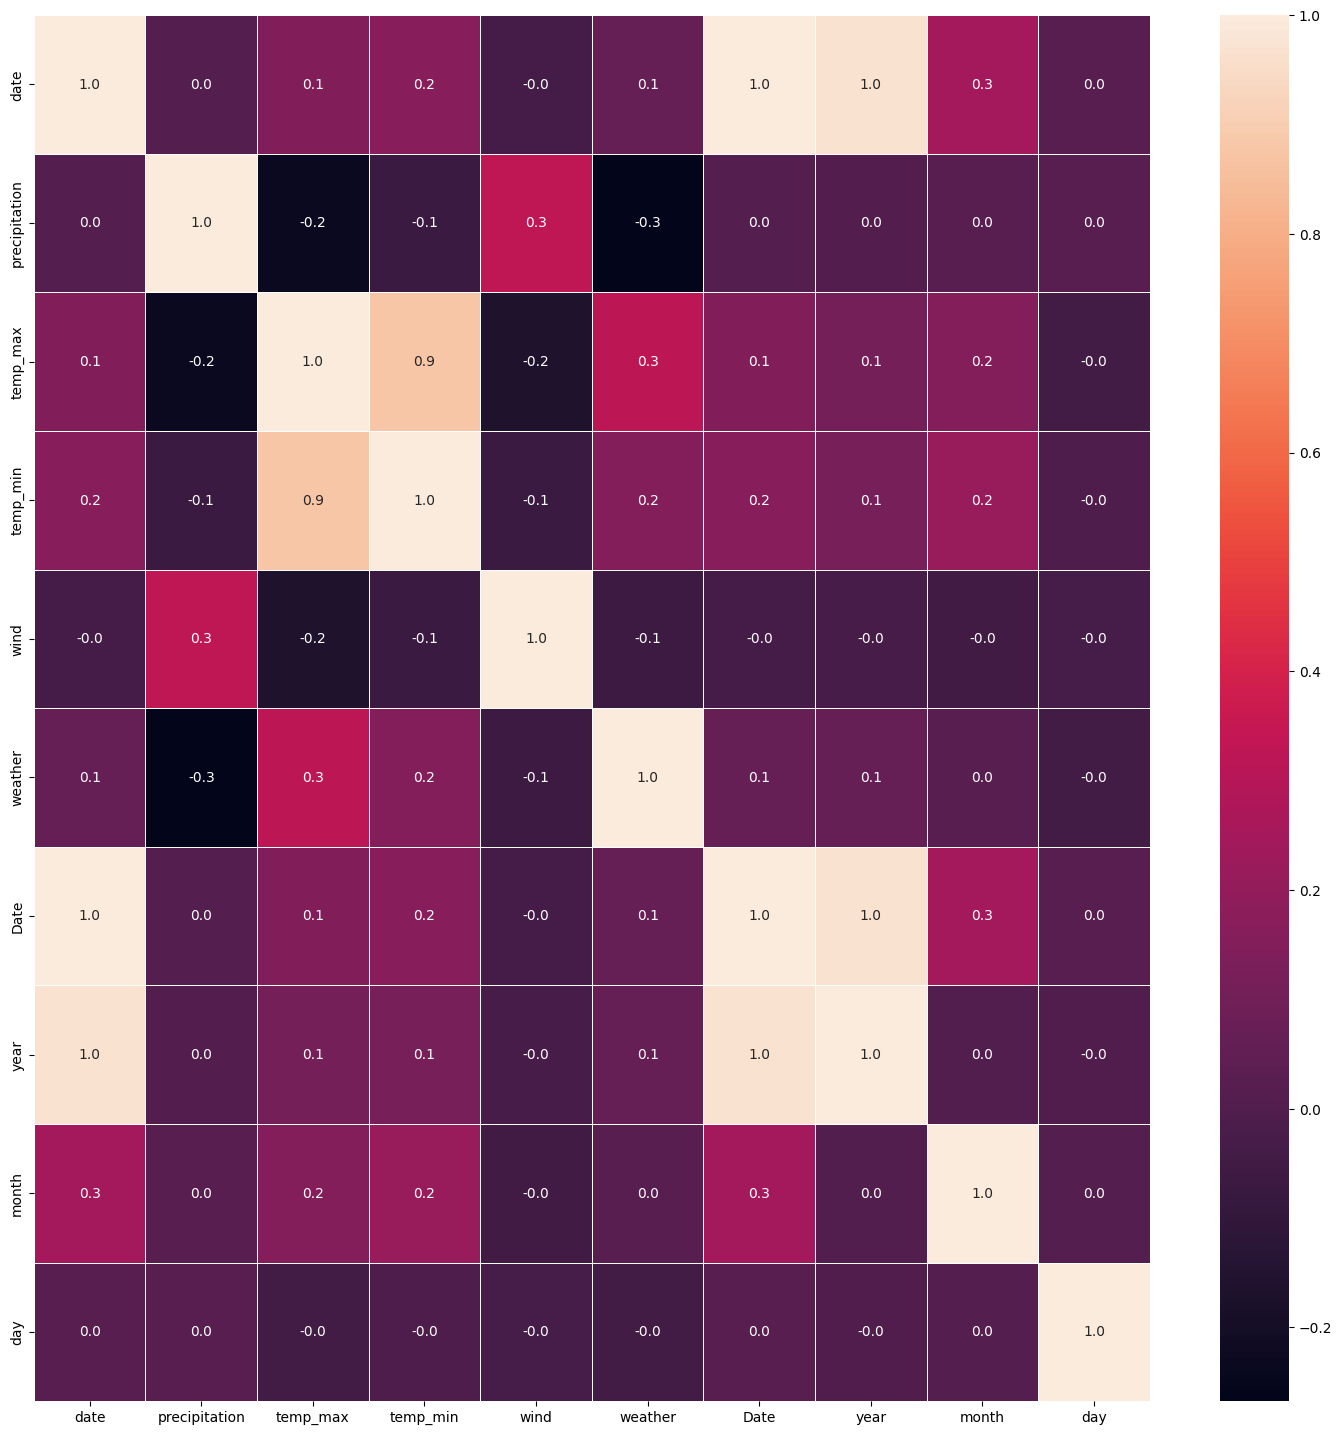

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_subset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
data_subset[quantitative].describe()

,precipitation,temp_max,temp_min,wind,weather
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2.752225
std,6.680194,7.349758,5.023004,1.437825,1.191380
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,2.000000
50%,0.000000,15.600000,8.300000,3.000000,2.000000
75%,2.800000,22.200000,12.200000,4.000000,4.000000
max,55.900000,35.600000,18.300000,9.500000,4.000000


<Figure size 1800x800 with 0 Axes>

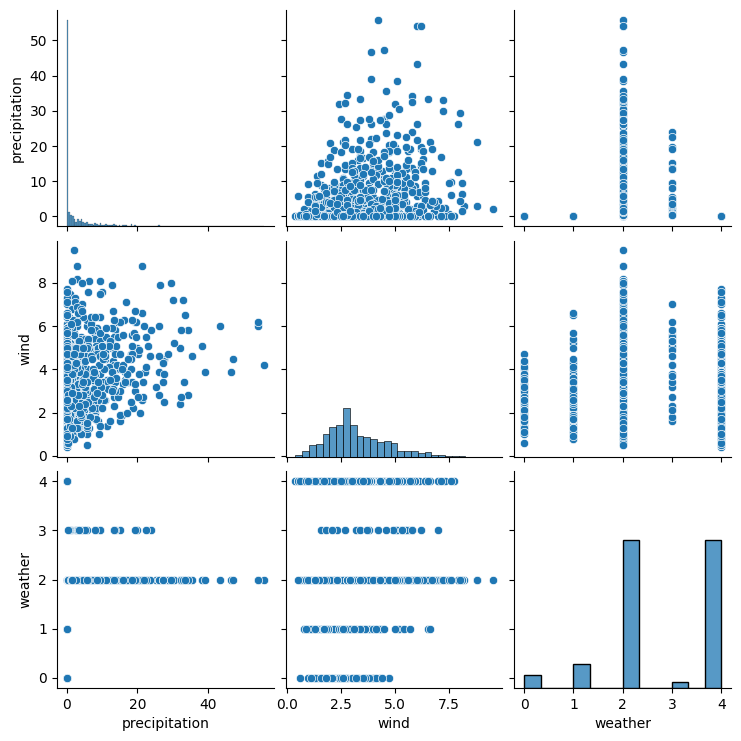

In [ ]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data_subset[['precipitation','wind', 'weather' ]])
plt.show()

<Figure size 1800x800 with 0 Axes>

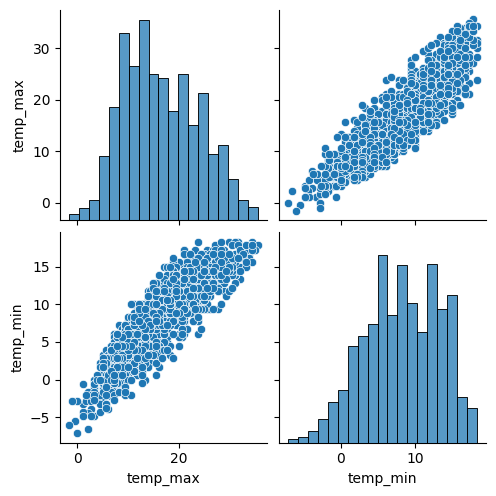

In [ ]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data_subset[['temp_max','temp_min']])
plt.show()

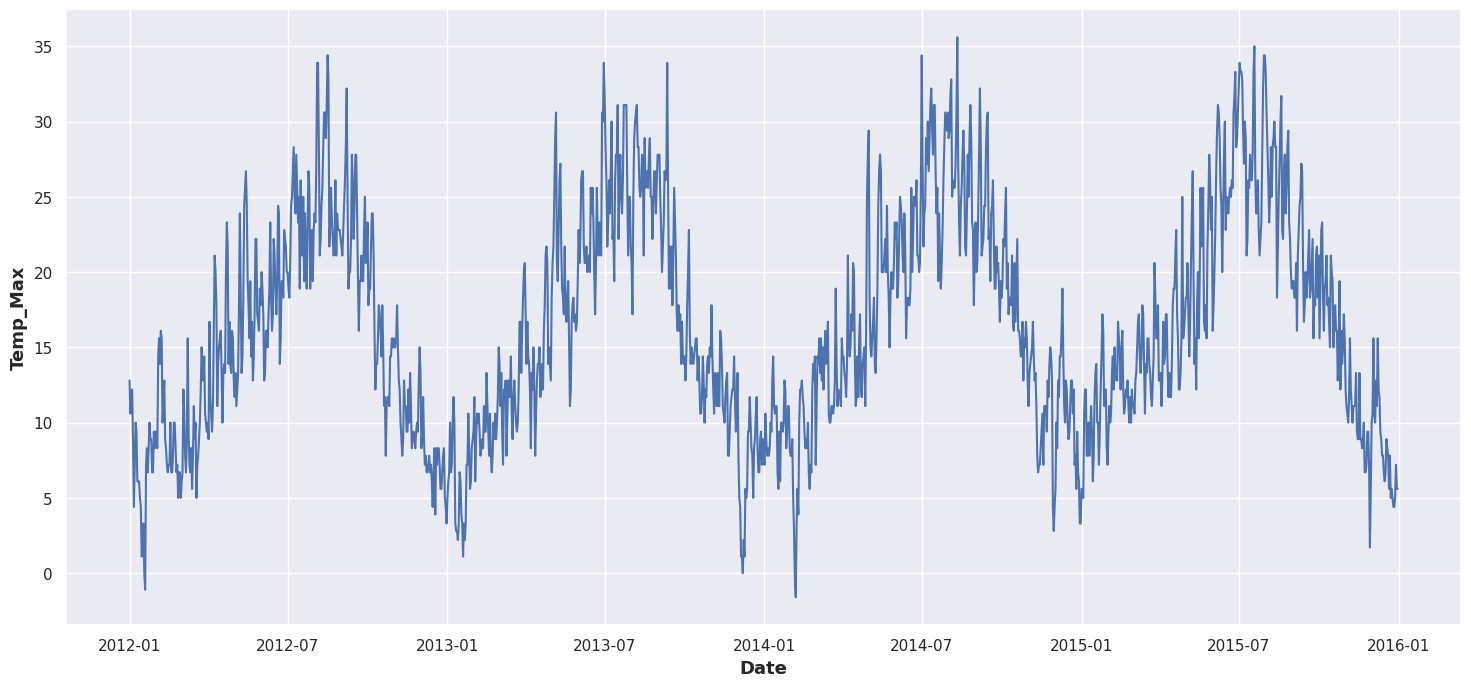

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data_subset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

<ipython-input-38-4a298ce5f864>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="weather", y="wind", data=data_subset, palette="YlGnBu")


<Axes: xlabel='weather', ylabel='wind'>

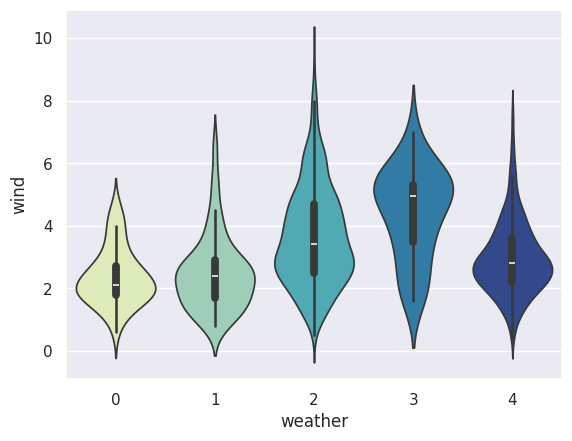

In [ ]:
sns.violinplot(x="weather", y="wind", data=data_subset, palette="YlGnBu")

In [ ]:
classes={
        'sun':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'drizzle':4,
}

<Figure size 1800x800 with 0 Axes>

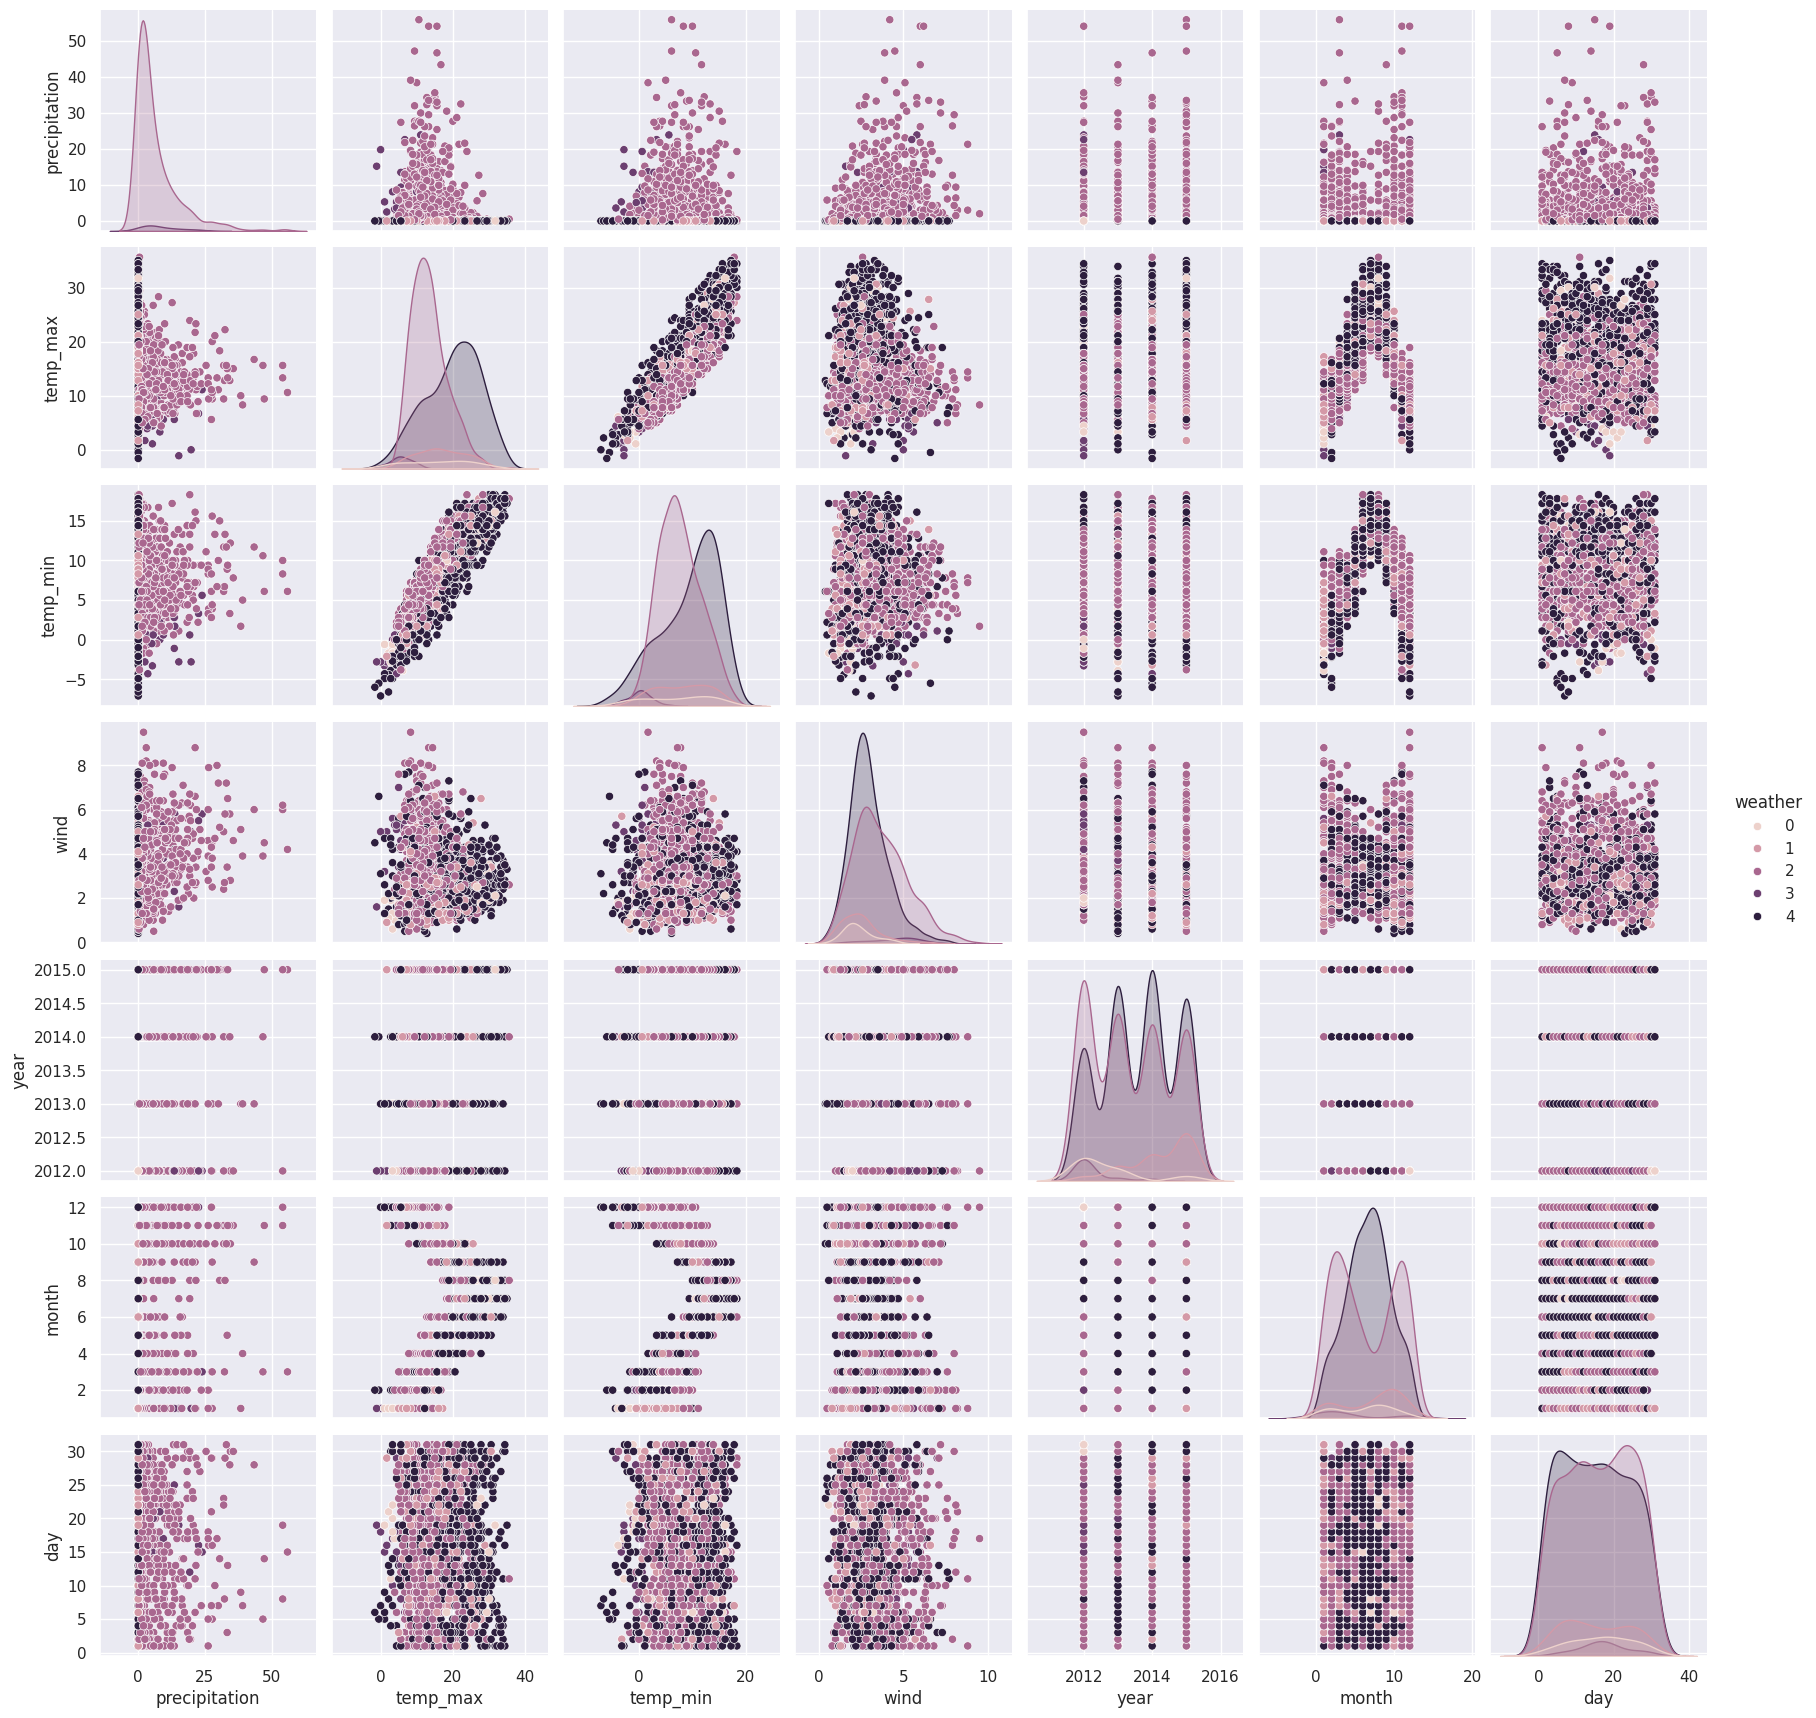

In [ ]:
plt.figure(figsize=(18,8))
sns.pairplot(data_subset.drop('date',axis=1),hue='weather')
plt.show()

In [ ]:
dataset=data_subset.drop('date', axis=1)

In [ ]:
dataset['weather']=dataset['weather'].astype('category')
dataset['weather']=dataset['weather'].cat.codes

Split the dataset into train and test

In [ ]:
x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [ ]:
x

,precipitation,temp_max,temp_min,wind,Date,year,month,day
0,0.0,12.8,5.0,4.7,2012-01-01,2012,1,1
1,10.9,10.6,2.8,4.5,2012-01-02,2012,1,2
2,0.8,11.7,7.2,2.3,2012-01-03,2012,1,3
3,20.3,12.2,5.6,4.7,2012-01-04,2012,1,4
4,1.3,8.9,2.8,6.1,2012-01-05,2012,1,5
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015-12-27,2015,12,27
1457,1.5,5.0,1.7,1.3,2015-12-28,2015,12,28
1458,0.0,7.2,0.6,2.6,2015-12-29,2015,12,29
1459,0.0,5.6,-1.0,3.4,2015-12-30,2015,12,30


In [ ]:
y

,weather
0,0
1,2
2,2
3,2
4,2
...,...
1456,2
1457,2
1458,1
1459,4


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
len(data)

1461

In [ ]:

len(X_train)

105

In [ ]:
len(X_test)

45

In [ ]:
from mlxtend.plotting import plot_decision_regions

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("*"*40)
print("Shape of X training data : ",X_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of X testing data : ",X_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of X training data :  (105, 2)
Shape of y training data :  (105,)
****************************************
Shape of X testing data :  (45, 2)
Shape of y testing data :  (45,)
****************************************


MODELS

In [ ]:
#LogisticRegression model
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(X_train,y_train)


In [ ]:
lrClassifier = LogisticRegression()

In [ ]:
lrClassifier.fit(X_train,y_train)

In [ ]:
prediction = lrClassifier.predict(X_test)

In [ ]:
prediction

In [ ]:
y_test[:100]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_true=y_test, y_pred=prediction)

In [ ]:
confusion_matrix(y_test,prediction)

In [ ]:
3+10+6+3+6+4+8+4+1

..

In [ ]:
#DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(X_train, y_train,sample_weight=None)

In [ ]:
data.drop(['date','weather','precipitation',],axis=1,inplace=True)
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [ ]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [ ]:
dtClassifer.fit(X_train, y_train)

In [ ]:
prediction = dtClassifer.predict(X_test)

In [ ]:
prediction

In [ ]:
y_test[:100]

In [ ]:
accuracy_score(y_true=y_test, y_pred=prediction)

In [ ]:
# KNeighbors model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(X_train,y_train)

In [ ]:
#RandomForest model
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(X_train, y_train,sample_weight=None)

In [ ]:
classifier_list=[classifier_log,classifier_dtc,classifier_knn,classifier_rfc]

In [ ]:
# accuracy test

def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [ ]:
accuracy_list=[]
classifier_list_str=[]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
for clf in classifier_list:
    acc=accuracy(X_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:4])